In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('data/stud.csv')

In [32]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
df.shape

(1000, 8)

# Data checks to perform

-  check missing values
-  check Duplicates
-  check data type
-  check the number of unique values of each columns
-  check statistics of data set
-  check various categories present in different categorical data



In [34]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [38]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [39]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Exploring data

In [42]:
df.columns = df.columns.str.replace(" ","_")
df.columns = df.columns.str.replace("/","_")

In [43]:
print("Categories in Gender column: ")
print(df['gender'].unique())
print("Categories in race/ethnicity column: ")
print(df['race_ethnicity'].unique())
print("Categories in parental level of education column: ")
print(df['parental_level_of_education'].unique())
print("Categories in lunch   column: ")
print(df['lunch'].unique())
print("Categories in test_preparation_course  column: ")
print(df['test_preparation_course'].unique())


Categories in Gender column: 
['female' 'male']
Categories in race/ethnicity column: 
['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education column: 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch   column: 
['standard' 'free/reduced']
Categories in test_preparation_course  column: 
['none' 'completed']


In [44]:
#  define numerical and categorical features


numerical_features = [col for col in df.columns if df[col].dtype != 'O']
categorical_features = [col for col in df.columns if df[col].dtype =='O']

print('we have {} numerical features: {} '.format(len(numerical_features),numerical_features))

print('we have {} categorical features: {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score'] 
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [45]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Adding Total scores and Average scores columns

In [46]:
df['Total_score'] = df['math_score']+df['writing_score']+df['reading_score']
df['Average'] = df['Total_score']/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [47]:
reading_full = df[df['reading_score']==100]['Average'].count()
writing_full = df[df['writing_score']==100]['Average'].count()
math_full = df[df['math_score']==100]['Average'].count()
print(f'No: of students with full marks in reading:{reading_full}')
print(f'No: of students with full marks in writting:{writing_full}')
print(f'No: of students with full marks in math:{math_full}')

No: of students with full marks in reading:17
No: of students with full marks in writting:14
No: of students with full marks in math:7


In [48]:
reading_less = df[df['reading_score']<=20]['Average'].count()
writing_less = df[df['writing_score']<=20]['Average'].count()
math_less = df[df['math_score']<=20]['Average'].count()
print(f'No: of students with less than 20 marks in reading:{reading_less}')
print(f'No: of students with less than 20 marks in writting:{writing_less}')
print(f'No: of students with less than 20 marks in math:{math_less}')

No: of students with less than 20 marks in reading:1
No: of students with less than 20 marks in writting:3
No: of students with less than 20 marks in math:4


### Histogram and Kde graph


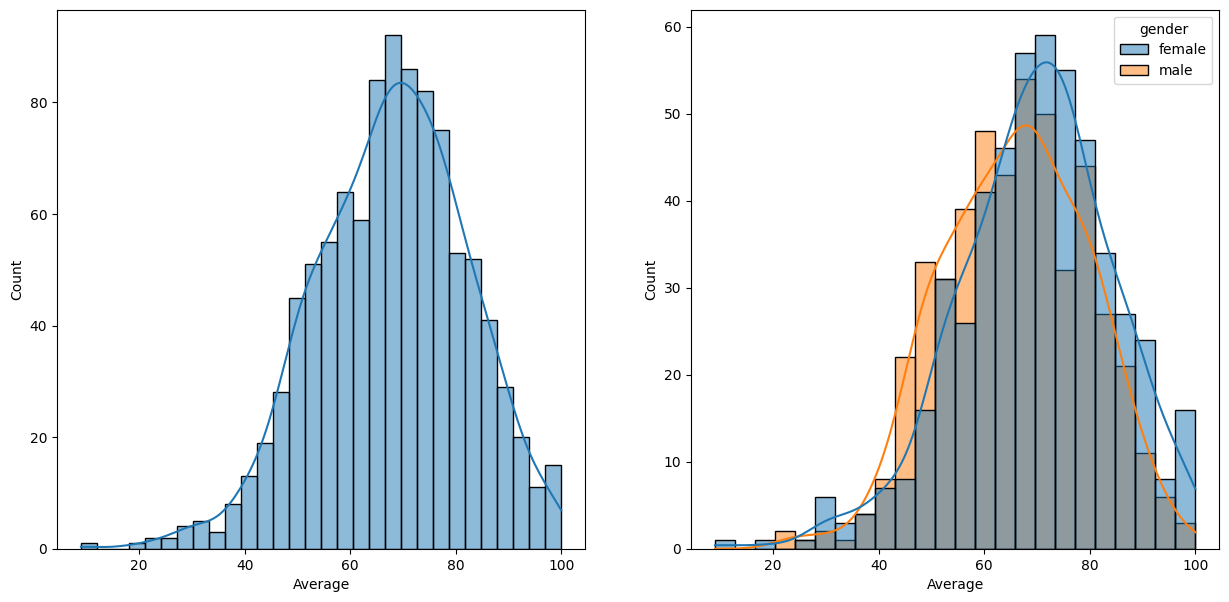

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data =df,x='Average',bins = 30,kde=True)
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

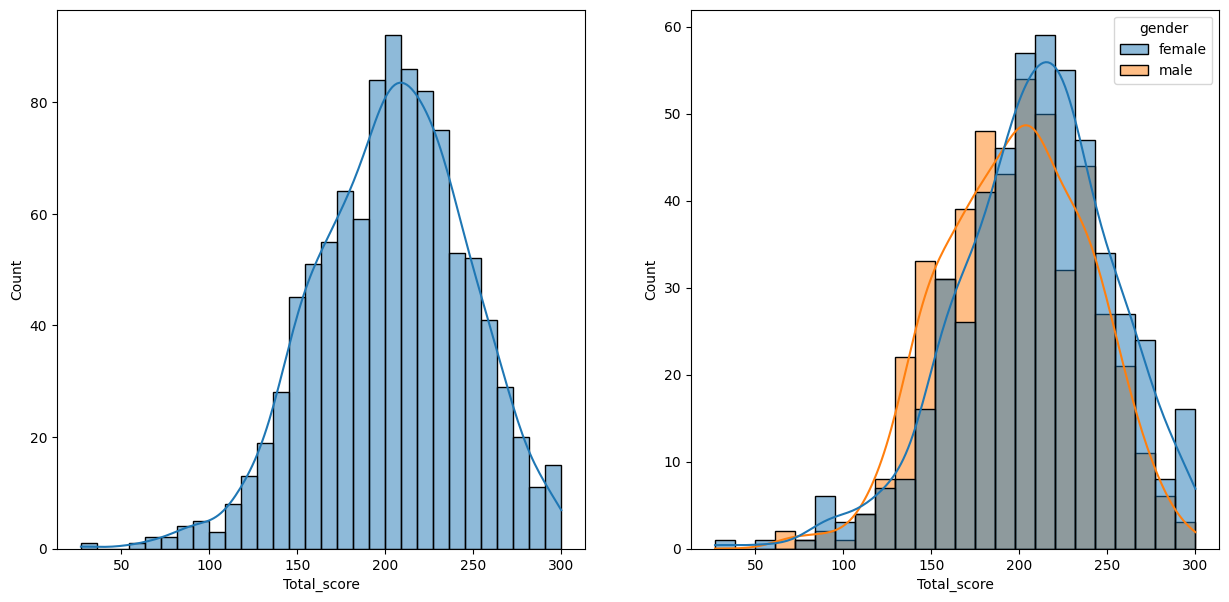

In [57]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data =df,x='Total_score',bins = 30,kde=True)
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()

<Axes: xlabel='lunch', ylabel='writing_score'>

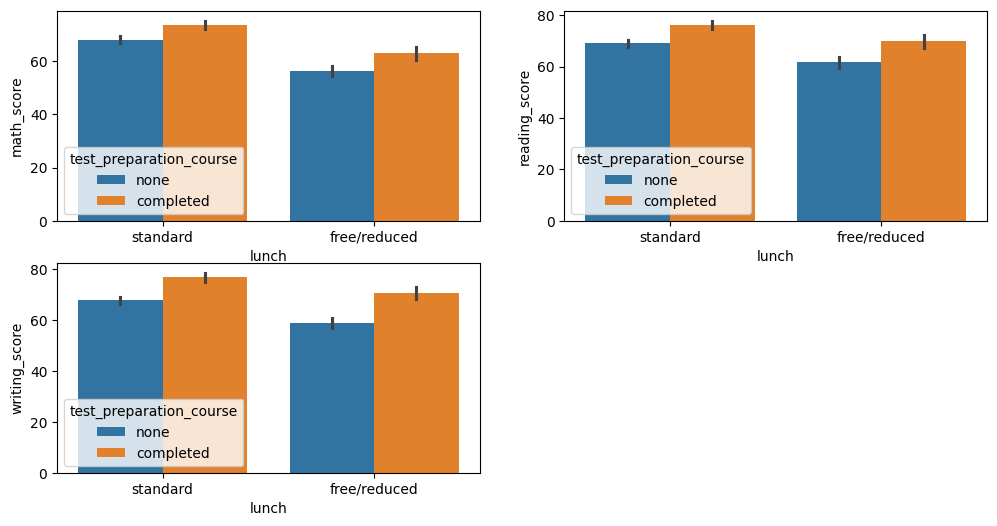

In [58]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

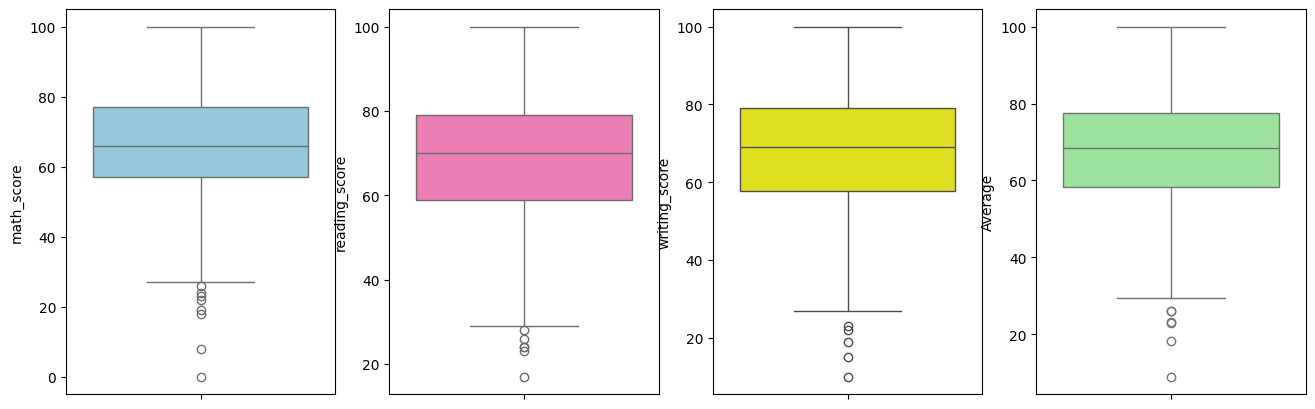

In [59]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

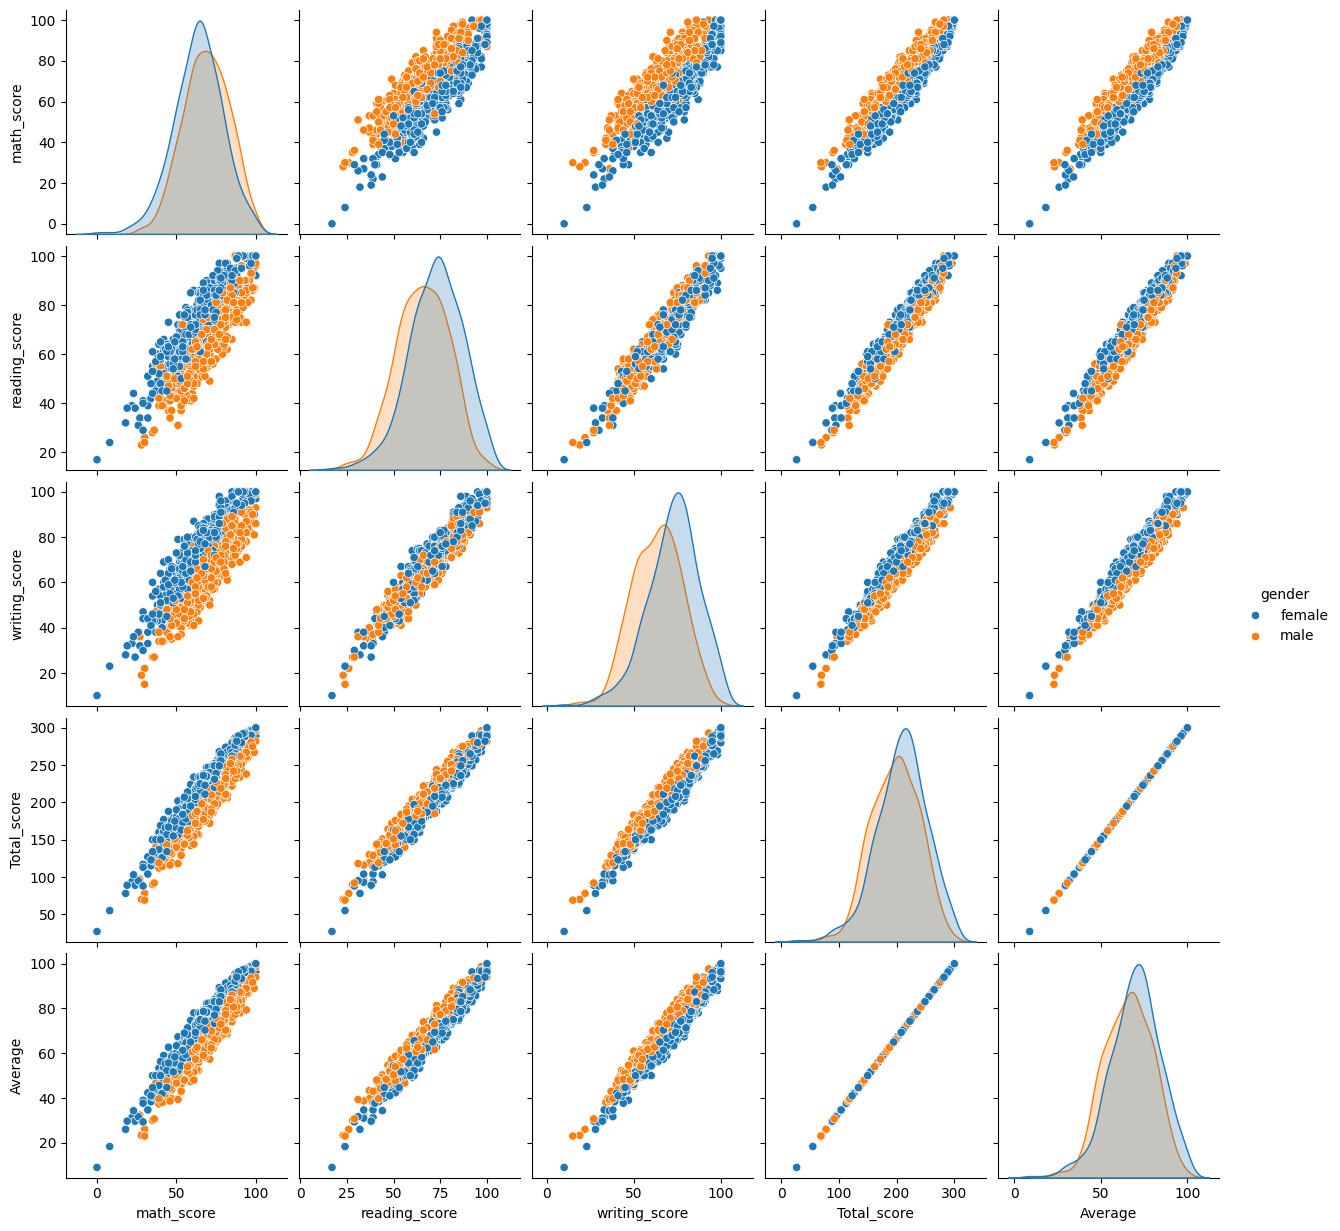

In [60]:
sns.pairplot(df,hue='gender')
plt.show()